FISRT_APPROACH
ALL FEATURES

FIRST_APPROACH
ALL_FEATURES
Gradient Boosting Evaluation Metrics:
R²   (R-squared):              -0.3463
MSE  (Mean Squared Error):     31489770821475.74
MAPE (Mean Absolute % Error):  50.08%

Polynomial Regression Evaluation Metrics:
R²   (R-squared):              -357290.7859
MSE  (Mean Squared Error):     8357134960230387712.00
MAPE (Mean Absolute % Error):  5705.11%

Linear Regression Evaluation Metrics:
R²   (R-squared):              -0.1660
MSE  (Mean Squared Error):     27274125813445.65
MAPE (Mean Absolute % Error):  53.27%

Random Forest Evaluation Metrics:
R²   (R-squared):              -0.1511
MSE  (Mean Squared Error):     26924853101710.23
MAPE (Mean Absolute % Error):  47.21%

Log-Transformed Random Forest Evaluation Metrics: 🥇
R²   (R-squared):              0.2957
MSE  (Mean Squared Error):     16473257419187.02
MAPE (Mean Absolute % Error):  39.51%

XGBoost Evaluation Metrics:
R²   (R-squared):              -0.1194
MSE  (Mean Squared Error):     26183788053661.45
MAPE (Mean Absolute % Error):  43.69%

GradientBoostingRegressor

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

gbr = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)
# Step 2: Train the model
gbr.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = gbr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # In %

# Print results
print("Gradient Boosting Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

*******************************************************************************

Polynomial Regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

# Step 1: Create polynomial features (degree=2 is a good start)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Train Linear Regression on the transformed features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 3: Predict
y_pred = model.predict(X_test_poly)

# Step 4: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Step 5: Print results
print("Polynomial Regression Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

***************************************************************************************

Linear Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

# Step 1: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Predict
y_pred = model.predict(X_test)

# Step 3: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Step 4: Print metrics
print("Linear Regression Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

*********************************************************************************************

Random Forest model

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Step 1: Train the model
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

# Step 3: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Step 4: Print results
print("Random Forest Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

Random Forest Evaluation Metrics:
R²   (R-squared):              -0.1511
MSE  (Mean Squared Error):     26924853101710.23
MAPE (Mean Absolute % Error):  47.21%


Random Forest Updated Code with Log Transform on Target

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

#  Step 1: Apply log transformation to the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

#  Step 2: Set up hyperparameter grid
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#  Step 3: Train the model using log-transformed target
grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid.fit(X_train, y_train_log)

best_model = grid.best_estimator_

#  Step 4: Predict and reverse the log transformation
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Reverse log1p

#  Step 5: Evaluate on original scale
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#  Step 6: Print results
print("Log-Transformed Random Forest Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


Log-Transformed Random Forest Evaluation Metrics:
R²   (R-squared):              0.2957
MSE  (Mean Squared Error):     16473257419187.02
MAPE (Mean Absolute % Error):  39.51%


Applying the top model Log-Transformed Random Forest
 trains on data up to 2022 and predicts Total_Returns_NextYear for each river in 2023, comparing with the real values (which are hidden during training)

full dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from tabulate import tabulate

# === Step 1: Load dataset ===
data_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_set_bristol_encoded.csv"
df = pd.read_csv(data_path)

# === Step 2: Keep original River column for later merge ===
df_river = df[['Year', 'River']].copy()

# === Step 3: One-hot encode River column ===
df_encoded = pd.get_dummies(df, columns=['River'], drop_first=False)

# === Step 4: Split dataset: train < 2023, test = 2023 ===
train_df = df_encoded[df_encoded['Year'] < 2023].copy()
test_df = df_encoded[df_encoded['Year'] == 2023].copy()

# Target and features
target_col = 'Total_Returns_NextYear'
feature_cols = [col for col in df_encoded.columns if col not in ['Year', target_col]]

X_train = train_df[feature_cols]
y_train_log = np.log1p(train_df[target_col])

X_test = test_df[feature_cols]
y_test_real = test_df[[target_col]].copy()

# === Step 5: GridSearchCV with RandomForestRegressor ===
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid.fit(X_train, y_train_log)
best_model = grid.best_estimator_

# === Step 6: Predict and inverse log ===
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# === Step 7: Merge river info back and calculate errors ===
rivers_2023 = df_river[df_river['Year'] == 2023].reset_index(drop=True)
results = y_test_real.reset_index(drop=True)
results['River'] = rivers_2023['River'].values
results['Predicted_Returns'] = y_pred
results['Absolute_Error'] = abs(results['Predicted_Returns'] - results[target_col])
results['APE (%)'] = 100 * results['Absolute_Error'] / results[target_col]

# === Step 8: Evaluation ===
r2 = r2_score(results[target_col], results['Predicted_Returns'])
mse = mean_squared_error(results[target_col], results['Predicted_Returns'])
mape = results['APE (%)'].mean()

# === Final Display ===
print("\n📊 2023 Predictions by River:\n")
print(tabulate(results[['River', 'Total_Returns_NextYear', 'Predicted_Returns', 'Absolute_Error', 'APE (%)']],
               headers='keys', tablefmt='pretty', showindex=False))




📊 2023 Predictions by River:

+----------+------------------------+--------------------+--------------------+--------------------+
|  River   | Total_Returns_NextYear | Predicted_Returns  |   Absolute_Error   |      APE (%)       |
+----------+------------------------+--------------------+--------------------+--------------------+
| Alagnak  |    4335434.71638467    | 1887977.4886300133 | 2447457.227754656  | 56.45240645661474  |
|  Egegik  |    4629742.7343397     |  11563996.3633467  |   6934253.629007   | 149.77621926104652 |
| Igushik  |    1572250.10905134    | 1191758.202219095  | 380491.90683224495 | 24.20046941906877  |
| Kvichak  |    12207052.9844853    | 6763470.838103057  | 5443582.146382243  | 44.593745544488335 |
|  Naknek  |    3160468.81052516    | 5915060.992632296  | 2754592.182107136  | 87.15770815183014  |
| Nushagak |    5629034.74787806    | 4623395.392922756  | 1005639.3549553035 | 17.865218461022874 |
| Ugashik  |    7955574.46845177    | 4188965.9666302833 | 3

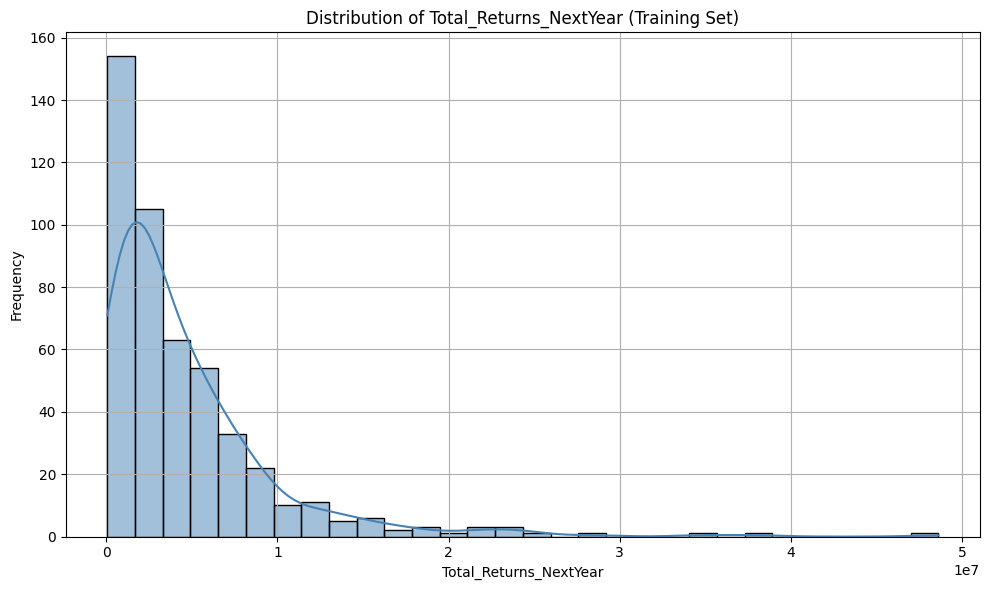

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of training target (non-log)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Total_Returns_NextYear'], kde=True, color='steelblue', bins=30)
plt.title("Distribution of Total_Returns_NextYear (Training Set)")
plt.xlabel("Total_Returns_NextYear")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

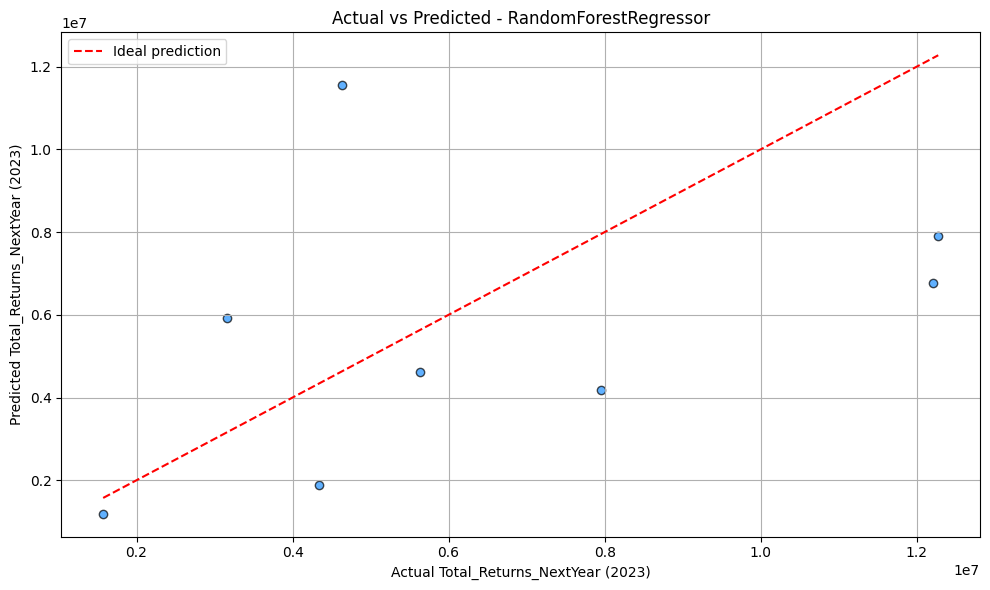

In [5]:
# Scatter plot of Actual vs Predicted values for 2023
plt.figure(figsize=(10, 6))
plt.scatter(y_test_real[target_col], y_pred, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test_real[target_col].min(), y_test_real[target_col].max()],
         [y_test_real[target_col].min(), y_test_real[target_col].max()],
         'r--', label="Ideal prediction")
plt.xlabel("Actual Total_Returns_NextYear (2023)")
plt.ylabel("Predicted Total_Returns_NextYear (2023)")
plt.title("Actual vs Predicted - RandomForestRegressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*********************************************************************************

In [ ]:
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

************************************************************************************************************

XGBoost Regressor

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

# Step 1: Train XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Predict
y_pred = xgb_model.predict(X_test)

# Step 3: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Step 4: Print results
print("XGBoost Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")